<a href="https://colab.research.google.com/github/minh041104/Final-Project-AIT2003-1/blob/main/Analyze_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import RegexpTokenizer
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

In [2]:
path="thongtinchinhphu.csv"

In [3]:
raw_df = pd.read_csv('thongtinchinhphu.csv')
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        142 non-null    int64  
 1   text                           142 non-null    object 
 2   post_text                      142 non-null    object 
 3   shared_text                    0 non-null      float64
 4   original_text                  0 non-null      float64
 5   time                           142 non-null    object 
 6   timestamp                      142 non-null    int64  
 7   image                          59 non-null     object 
 8   image_lowquality               142 non-null    object 
 9   images                         142 non-null    object 
 10  images_description             142 non-null    object 
 11  images_lowquality              142 non-null    object 
 12  images_lowquality_description  142 non-null    obj

In [4]:
raw_df.dropna(axis = 1, thresh = 30, inplace = True)
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   post_id                        142 non-null    int64 
 1   text                           142 non-null    object
 2   post_text                      142 non-null    object
 3   time                           142 non-null    object
 4   timestamp                      142 non-null    int64 
 5   image                          59 non-null     object
 6   image_lowquality               142 non-null    object
 7   images                         142 non-null    object
 8   images_description             142 non-null    object
 9   images_lowquality              142 non-null    object
 10  images_lowquality_description  142 non-null    object
 11  comments                       142 non-null    int64 
 12  shares                         142 non-null    int64 
 13  post_

In [5]:
selected_columns = ['post_id', 'post_text', 'time', 'comments', 'comments_full', 'shares', 'post_url', 'reactors', 'reactions', 'reaction_count', 'fetched_time']
raw_df = raw_df[selected_columns]

In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   post_id         142 non-null    int64 
 1   post_text       142 non-null    object
 2   time            142 non-null    object
 3   comments        142 non-null    int64 
 4   comments_full   142 non-null    object
 5   shares          142 non-null    int64 
 6   post_url        142 non-null    object
 7   reactors        132 non-null    object
 8   reactions       132 non-null    object
 9   reaction_count  142 non-null    int64 
 10  fetched_time    132 non-null    object
dtypes: int64(4), object(7)
memory usage: 12.3+ KB


In [7]:
raw_df['post_id'] = raw_df['post_id'].astype('string')
raw_df['post_text'] = raw_df['post_text'].astype('string')
raw_df['post_url'] = raw_df['post_url'].astype('string')
raw_df['reactions'] = raw_df['reactions'].astype('string')
raw_df['time'] = pd.to_datetime(raw_df['time'])
raw_df['fetched_time'] = pd.to_datetime(raw_df['fetched_time'])

In [8]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   post_id         142 non-null    string        
 1   post_text       142 non-null    string        
 2   time            142 non-null    datetime64[ns]
 3   comments        142 non-null    int64         
 4   comments_full   142 non-null    object        
 5   shares          142 non-null    int64         
 6   post_url        142 non-null    string        
 7   reactors        132 non-null    object        
 8   reactions       132 non-null    string        
 9   reaction_count  142 non-null    int64         
 10  fetched_time    132 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(2), string(4)
memory usage: 12.3+ KB


In [9]:
raw_df[raw_df["reactors"].isnull()].index

Int64Index([132, 133, 134, 135, 136, 137, 138, 139, 140, 141], dtype='int64')

In [10]:
index_to_drop = raw_df[raw_df["reactors"].isnull()].index
raw_df.drop(index_to_drop, inplace=True)
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   post_id         132 non-null    string        
 1   post_text       132 non-null    string        
 2   time            132 non-null    datetime64[ns]
 3   comments        132 non-null    int64         
 4   comments_full   132 non-null    object        
 5   shares          132 non-null    int64         
 6   post_url        132 non-null    string        
 7   reactors        132 non-null    object        
 8   reactions       132 non-null    string        
 9   reaction_count  132 non-null    int64         
 10  fetched_time    132 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(2), string(4)
memory usage: 11.5+ KB


In [11]:
raw_df.drop_duplicates(subset= 'post_id', inplace= True)
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 0 to 131
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   post_id         132 non-null    string        
 1   post_text       132 non-null    string        
 2   time            132 non-null    datetime64[ns]
 3   comments        132 non-null    int64         
 4   comments_full   132 non-null    object        
 5   shares          132 non-null    int64         
 6   post_url        132 non-null    string        
 7   reactors        132 non-null    object        
 8   reactions       132 non-null    string        
 9   reaction_count  132 non-null    int64         
 10  fetched_time    132 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(2), string(4)
memory usage: 12.4+ KB


In [12]:
import ast
# Định nghĩa hàm để thêm các key còn thiếu và đặt giá trị là 0
def fill_missing_keys(reactions_str):
    try:
        reactions_dict = ast.literal_eval(reactions_str)
    except (ValueError, SyntaxError):
        # Xử lý nếu không thể chuyển đổi thành từ điển
        reactions_dict = {}

    all_keys = ['thích', 'yêu thích', 'haha', 'wow', 'thương thương', 'buồn', 'phẫn nộ']
    return {key: reactions_dict.get(key, 0) for key in all_keys}

# Áp dụng hàm cho cột 'reactions' và điền thiếu dữ liệu
raw_df['reactions'] = raw_df['reactions'].apply(lambda x: fill_missing_keys(x))

# Hiển thị cột reactions sau khi điền dữ liệu bị thiếu
raw_df['reactions'].value_counts()

{'thích': 19, 'yêu thích': 3, 'haha': 0, 'wow': 0, 'thương thương': 0, 'buồn': 0, 'phẫn nộ': 0}           1
{'thích': 1429, 'yêu thích': 47, 'haha': 359, 'wow': 10, 'thương thương': 4, 'buồn': 3, 'phẫn nộ': 0}     1
{'thích': 2260, 'yêu thích': 100, 'haha': 4, 'wow': 4, 'thương thương': 6, 'buồn': 0, 'phẫn nộ': 0}       1
{'thích': 2378, 'yêu thích': 65, 'haha': 0, 'wow': 4, 'thương thương': 96, 'buồn': 432, 'phẫn nộ': 0}     1
{'thích': 1856, 'yêu thích': 20, 'haha': 21, 'wow': 11, 'thương thương': 3, 'buồn': 12, 'phẫn nộ': 1}     1
                                                                                                         ..
{'thích': 947, 'yêu thích': 96, 'haha': 1, 'wow': 3, 'thương thương': 9, 'buồn': 0, 'phẫn nộ': 0}         1
{'thích': 1554, 'yêu thích': 40, 'haha': 13, 'wow': 2, 'thương thương': 8, 'buồn': 2, 'phẫn nộ': 0}       1
{'thích': 1672, 'yêu thích': 179, 'haha': 2, 'wow': 1, 'thương thương': 19, 'buồn': 0, 'phẫn nộ': 0}      1
{'thích': 3025, 'yêu thích':

In [13]:
# Sử dụng json_normalize để tách từng key thành các cột riêng biệt
reactions_normalized = pd.json_normalize(raw_df['reactions'])

# Ghép DataFrame mới vào DataFrame cũ
raw_df = pd.concat([raw_df, reactions_normalized], axis=1)
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 0 to 131
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   post_id         132 non-null    string        
 1   post_text       132 non-null    string        
 2   time            132 non-null    datetime64[ns]
 3   comments        132 non-null    int64         
 4   comments_full   132 non-null    object        
 5   shares          132 non-null    int64         
 6   post_url        132 non-null    string        
 7   reactors        132 non-null    object        
 8   reactions       132 non-null    object        
 9   reaction_count  132 non-null    int64         
 10  fetched_time    132 non-null    datetime64[ns]
 11  thích           132 non-null    int64         
 12  yêu thích       132 non-null    int64         
 13  haha            132 non-null    int64         
 14  wow             132 non-null    int64         
 15  thương

In [14]:
raw_df.rename(columns={
'thích': 'like',
'yêu thích': 'love',
'thương thương': 'care',
'buồn': 'sad',
'phẫn nộ': 'angry'}, inplace=True)

In [15]:
raw_df['time_difference'] = raw_df['fetched_time'] - raw_df['time']
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 0 to 131
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   post_id          132 non-null    string         
 1   post_text        132 non-null    string         
 2   time             132 non-null    datetime64[ns] 
 3   comments         132 non-null    int64          
 4   comments_full    132 non-null    object         
 5   shares           132 non-null    int64          
 6   post_url         132 non-null    string         
 7   reactors         132 non-null    object         
 8   reactions        132 non-null    object         
 9   reaction_count   132 non-null    int64          
 10  fetched_time     132 non-null    datetime64[ns] 
 11  like             132 non-null    int64          
 12  love             132 non-null    int64          
 13  haha             132 non-null    int64          
 14  wow              132 non-n

In [16]:
raw_df.to_csv('clean_df.csv', index=False)

In [17]:
df = pd.read_csv('clean_df.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   post_id          132 non-null    int64 
 1   post_text        132 non-null    object
 2   time             132 non-null    object
 3   comments         132 non-null    int64 
 4   comments_full    132 non-null    object
 5   shares           132 non-null    int64 
 6   post_url         132 non-null    object
 7   reactors         132 non-null    object
 8   reactions        132 non-null    object
 9   reaction_count   132 non-null    int64 
 10  fetched_time     132 non-null    object
 11  like             132 non-null    int64 
 12  love             132 non-null    int64 
 13  haha             132 non-null    int64 
 14  wow              132 non-null    int64 
 15  care             132 non-null    int64 
 16  sad              132 non-null    int64 
 17  angry            132 non-null    in

In [18]:
df['post_id'] = df['post_id'].astype('string')
df['post_text'] = df['post_text'].astype('string')
df['post_url'] = df['post_url'].astype('string')
df['reactions'] = df['reactions'].astype('string')
df['time'] = pd.to_datetime(df['time'])
df['fetched_time'] = pd.to_datetime(df['fetched_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   post_id          132 non-null    string        
 1   post_text        132 non-null    string        
 2   time             132 non-null    datetime64[ns]
 3   comments         132 non-null    int64         
 4   comments_full    132 non-null    object        
 5   shares           132 non-null    int64         
 6   post_url         132 non-null    string        
 7   reactors         132 non-null    object        
 8   reactions        132 non-null    string        
 9   reaction_count   132 non-null    int64         
 10  fetched_time     132 non-null    datetime64[ns]
 11  like             132 non-null    int64         
 12  love             132 non-null    int64         
 13  haha             132 non-null    int64         
 14  wow              132 non-null    int64    

In [19]:
# Lấy 10 bài viết có reaction lớn nhất
top_10react_posts = df.sort_values(by='reaction_count', ascending=False).head(10)

# Hiển thị thông tin của 10 bài viết có reaction lớn nhất
top_10react_posts['reaction_count']

72     38538
62     37173
68     19429
54     15330
43     12344
44     12075
50     10906
122    10783
98     10258
116     9841
Name: reaction_count, dtype: int64

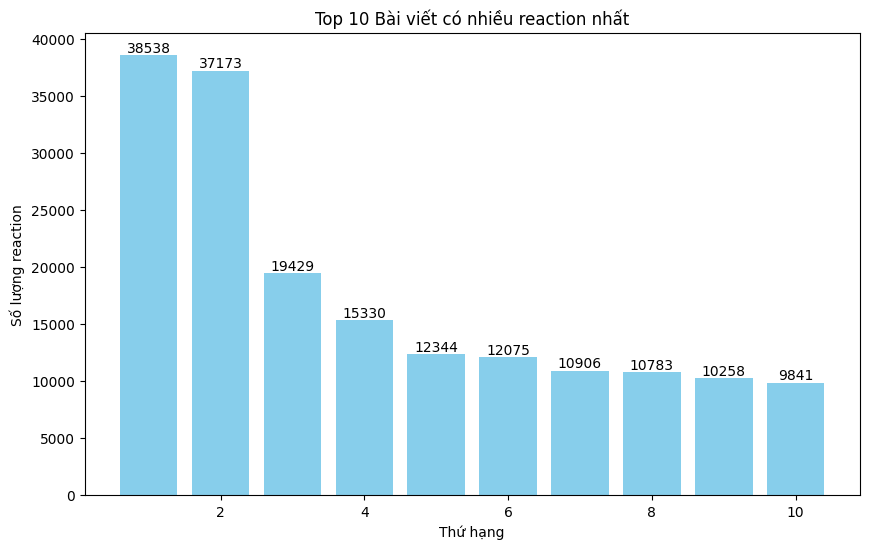

In [20]:
ranks = list(range(1, 11))

# Vẽ biểu đồ cột cho 10 bài viết có reaction lớn nhất và thêm nhãn số lượng reaction
plt.figure(figsize=(10, 6))
bars = plt.bar(ranks, top_10react_posts['reaction_count'], color='skyblue')
plt.title('Top 10 Bài viết có nhiều reaction nhất')
plt.xlabel('Thứ hạng')
plt.ylabel('Số lượng reaction')

# Thêm nhãn số lượng reaction trực tiếp lên các thanh cột
for i, value in enumerate(top_10react_posts['reaction_count']):
    plt.text(i + 1, value + 0.1, f'{value}', ha='center', va='bottom')

In [21]:
# Lấy index của bài viết có nhiều reaction nhất
max_reaction_index = df['reaction_count'].idxmax()
# Lấy thông tin của bài viết có nhiều reaction nhất
max_reaction_post = df.loc[max_reaction_index]
print(max_reaction_post['post_url'])

https://facebook.com/thongtinchinhphu/posts/765583765606406


In [22]:
# Lấy 10 bài viết có comment lớn nhất
top_10comment_posts = df.sort_values(by='comments', ascending=False).head(10)

# Hiển thị thông tin của 10 bài viết có comment lớn nhất
top_10comment_posts['comments']

54     1545
43     1004
72      814
62      786
18      635
16      586
68      454
106     397
61      392
26      327
Name: comments, dtype: int64

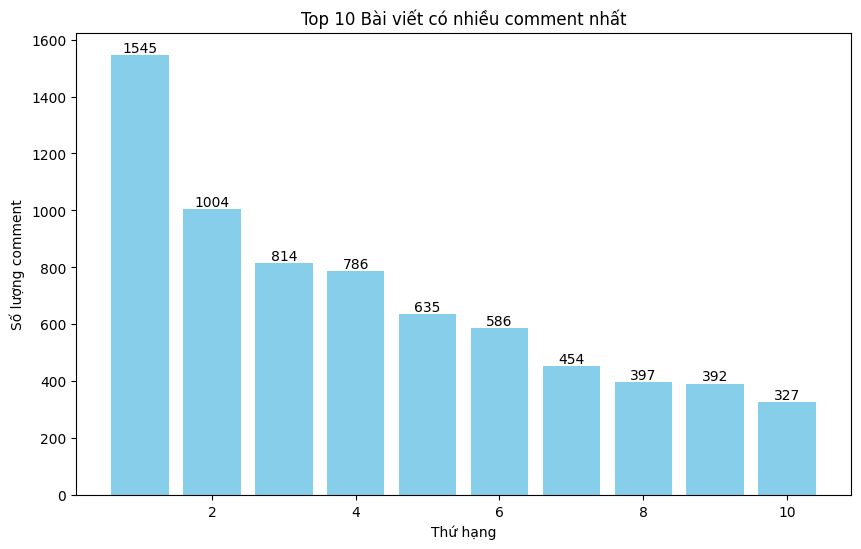

In [23]:
# Vẽ biểu đồ cột cho 10 bài viết có comment lớn nhất và thêm nhãn số lượng comment
plt.figure(figsize=(10, 6))
bars = plt.bar(ranks, top_10comment_posts['comments'], color='skyblue')
plt.title('Top 10 Bài viết có nhiều comment nhất')
plt.xlabel('Thứ hạng')
plt.ylabel('Số lượng comment')

# Thêm nhãn số lượng comment trực tiếp lên các thanh cột
for i, value in enumerate(top_10comment_posts['comments']):
    plt.text(i + 1, value + 0.1, f'{value}', ha='center', va='bottom')

In [24]:
# Lấy index của bài viết có nhiều comment nhất
max_comment_index = df['comments'].idxmax()
# Lấy thông tin của bài viết có nhiều comment nhất
max_comment_post = df.loc[max_comment_index]
print(max_comment_post['post_url'])

https://facebook.com/thongtinchinhphu/posts/766226742208775


In [25]:
# Lấy 10 bài viết có share lớn nhất
top_10share_posts = df.sort_values(by='shares', ascending=False).head(10)

# Hiển thị thông tin của 10 bài viết có share lớn nhất
top_10share_posts['shares']

92     2707
72     1843
61     1460
62     1293
54     1008
31      558
68      373
126     367
101     313
18      292
Name: shares, dtype: int64

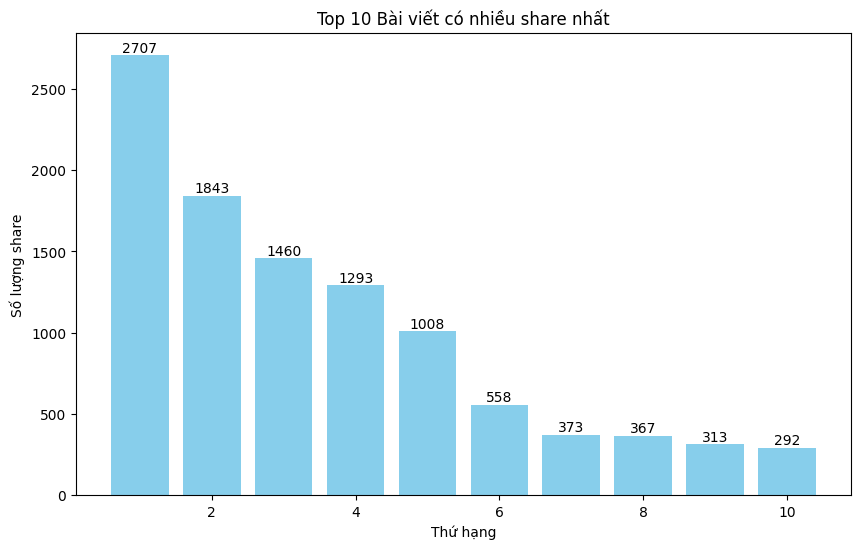

In [26]:
# Vẽ biểu đồ cột cho 10 bài viết có share lớn nhất và thêm nhãn số lượng share
plt.figure(figsize=(10, 6))
bars = plt.bar(ranks, top_10share_posts['shares'], color='skyblue')
plt.title('Top 10 Bài viết có nhiều share nhất')
plt.xlabel('Thứ hạng')
plt.ylabel('Số lượng share')

# Thêm nhãn số lượng share trực tiếp lên các thanh cột
for i, value in enumerate(top_10share_posts['shares']):
    plt.text(i + 1, value + 0.1, f'{value}', ha='center', va='bottom')

In [27]:
# Lấy index của bài viết có nhiều share nhất
max_share_index = df['shares'].idxmax()
# Lấy thông tin của bài viết có nhiều share nhất
max_share_post = df.loc[max_share_index]
print(max_share_post['post_url'])

https://facebook.com/thongtinchinhphu/posts/764627912368658


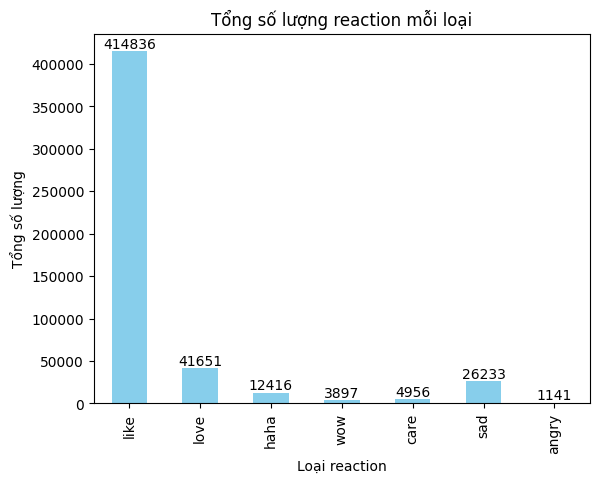

In [28]:
# Tính tổng số lượng reaction cho mỗi cột
emotion_totals = df[['like', 'love', 'haha', 'wow', 'care', 'sad' , 'angry']].sum()
# Vẽ biểu đồ cột
emotion_totals.plot(kind='bar', color='skyblue')
plt.title('Tổng số lượng reaction mỗi loại')
plt.xlabel('Loại reaction')
plt.ylabel('Tổng số lượng')
for i, value in enumerate(emotion_totals):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.show()

In [29]:
# Tính trung bình số lượng reaction mỗi bài viết
average_reaction_per_post = df['reaction_count'].mean()
average_reaction_per_post

3826.742424242424

In [30]:
# Tính trung bình số lượng mỗi loại reaction trong mỗi bài viết
average_reaction_per_type = df[['like', 'love', 'haha', 'wow',
'care', 'sad', 'angry']].mean()
average_reaction_per_type

like     3142.696970
love      315.537879
haha       94.060606
wow        29.522727
care       37.545455
sad       198.734848
angry       8.643939
dtype: float64

In [31]:
df['day'] = df['time'].dt.to_period('D')
df['day'] = df['day'].dt.to_timestamp()

In [32]:
# Tính tổng số lượng reaction mỗi ngày
daily_reaction_count = df.groupby('day')['reaction_count'].sum()

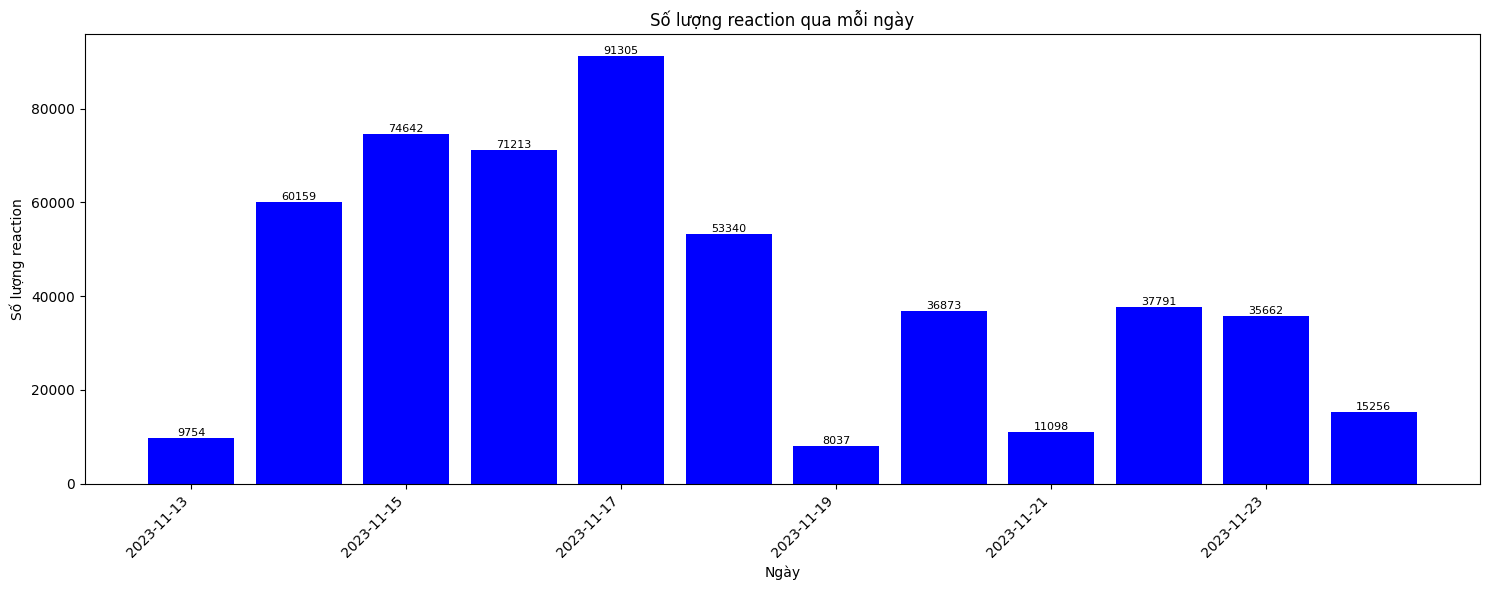

In [33]:
# Visualize số lượng reaction qua mỗi ngày
plt.figure(figsize=(15, 6))
bars = plt.bar(daily_reaction_count.index, daily_reaction_count.values, color='blue')

# Thêm giá trị trên cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='black', fontsize=8)

plt.title('Số lượng reaction qua mỗi ngày')
plt.xlabel('Ngày')
plt.ylabel('Số lượng reaction')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [34]:
df['hour'] = df['time'].dt.hour

In [35]:
# Tính tần suất đăng bài của mỗi giờ
hourly_post_frequency = df['hour'].value_counts().sort_index()

In [36]:
# Tính giá trị trung bình của tần suất đăng bài
mean = df['hour'].value_counts().mean() * np.ones(len(hourly_post_frequency))

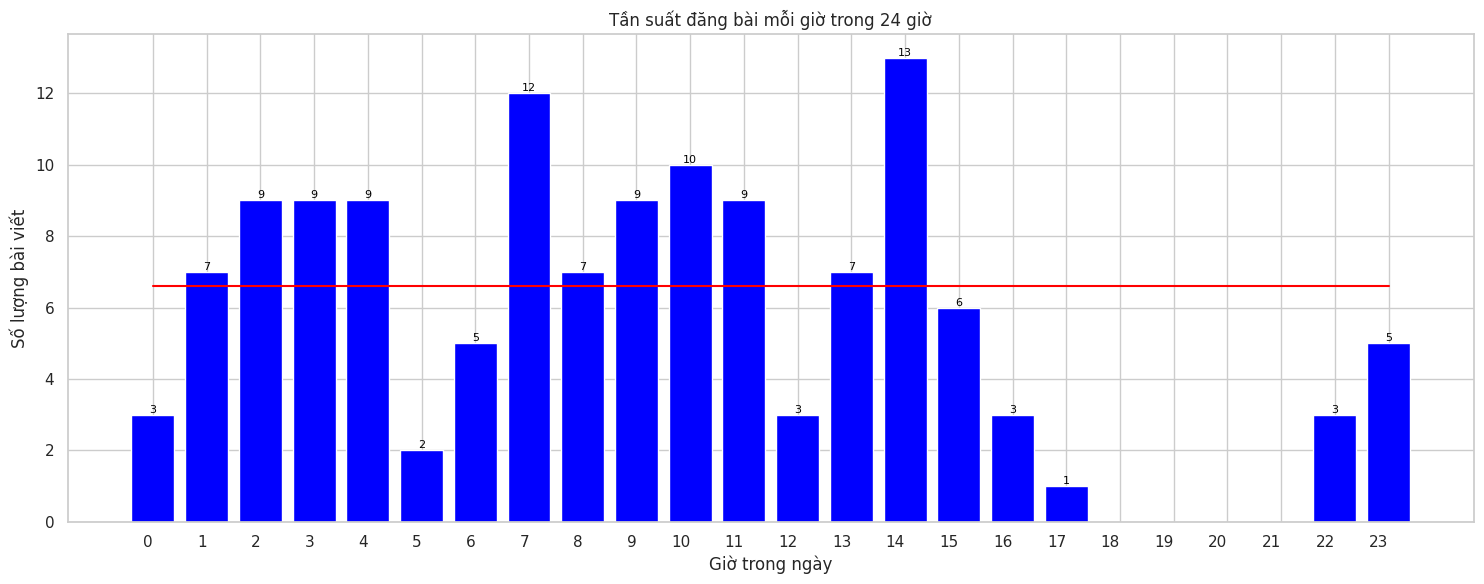

In [58]:
# # Visualize tần suất đăng bài mỗi giờ
plt.figure(figsize=(15, 6))
bars = plt.bar(hourly_post_frequency.index, hourly_post_frequency.values, color='blue')
plt.plot(hourly_post_frequency.index, mean, color = 'red', label= 'Average posts')
# Thêm giá trị trên cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='black', fontsize=8)

plt.title('Tần suất đăng bài mỗi giờ trong 24 giờ')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Số lượng bài viết')
plt.xticks(range(24), ha="right")
plt.tight_layout()
plt.show()

In [38]:
# Số lượng bài viết mỗi ngày
daily_post_count = df.groupby('day')['post_id'].count()

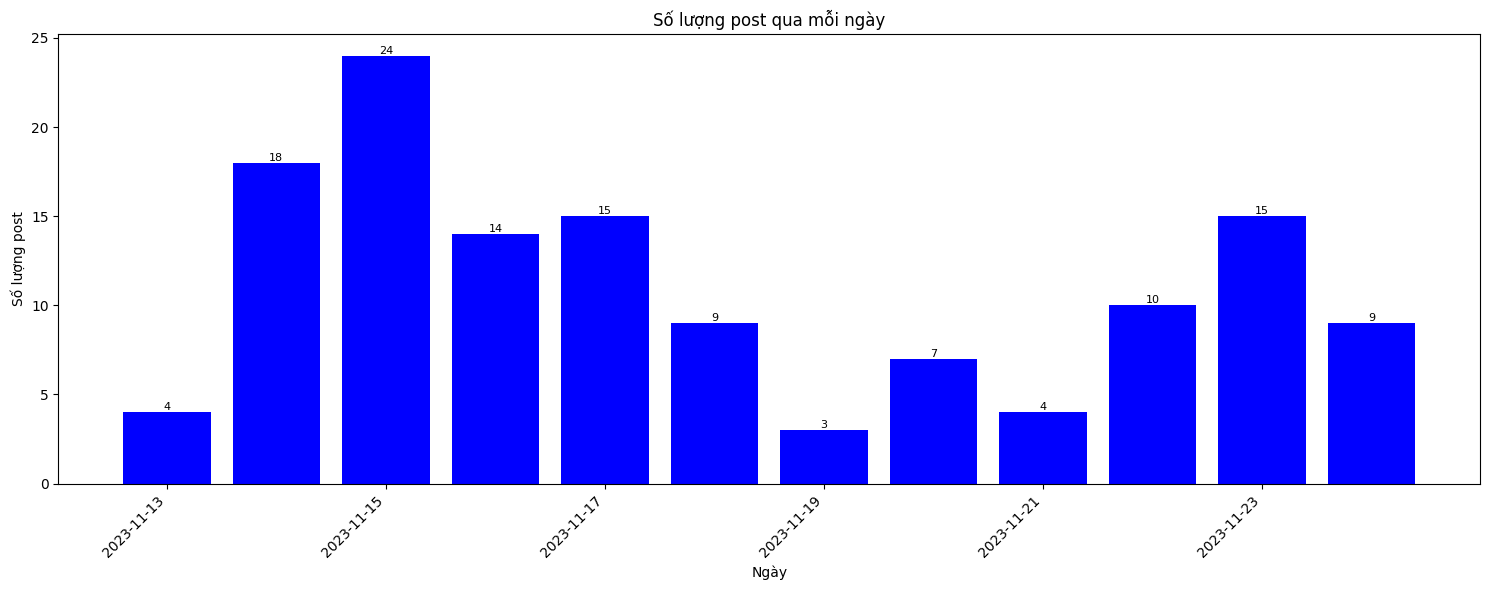

In [39]:
# Visualize tần suất đăng bài mỗi ngày
plt.figure(figsize=(15, 6))
bars = plt.bar(daily_post_count.index, daily_post_count.values, color='blue')

# Thêm giá trị trên cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='black', fontsize=8)

plt.title('Số lượng post qua mỗi ngày')
plt.xlabel('Ngày')
plt.ylabel('Số lượng post')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Comment

In [40]:
average_comments_per_post = df['comments'].mean()
average_comments_per_post

116.66666666666667

In [41]:
# Sử dụng regular expression để tách từ và loại bỏ các kí tự đặc biệt
tokenizer = RegexpTokenizer(r'\b\w+\b')
df['words'] = df['post_text'].apply(lambda x: tokenizer.tokenize(x))

# Kết hợp tất cả từ đã lọc
all_filtered_words = [word for words in df['words'] for word in words]

# Đếm tần suất xuất hiện của từng từ
word_counts = Counter(all_filtered_words)

# Lấy 10 từ xuất hiện nhiều nhất
top_keywords = word_counts.most_common(10)

print("Top 10 từ xuất hiện nhiều nhất:")
for keyword, count in top_keywords:
    print(f"{keyword}: {count} lần")

Top 10 từ xuất hiện nhiều nhất:
và: 234 lần
các: 232 lần
của: 154 lần
Việt: 139 lần
Nam: 136 lần
tại: 127 lần
nước: 116 lần
có: 113 lần
đã: 100 lần
là: 96 lần


(-0.5, 1999.5, 1199.5, -0.5)

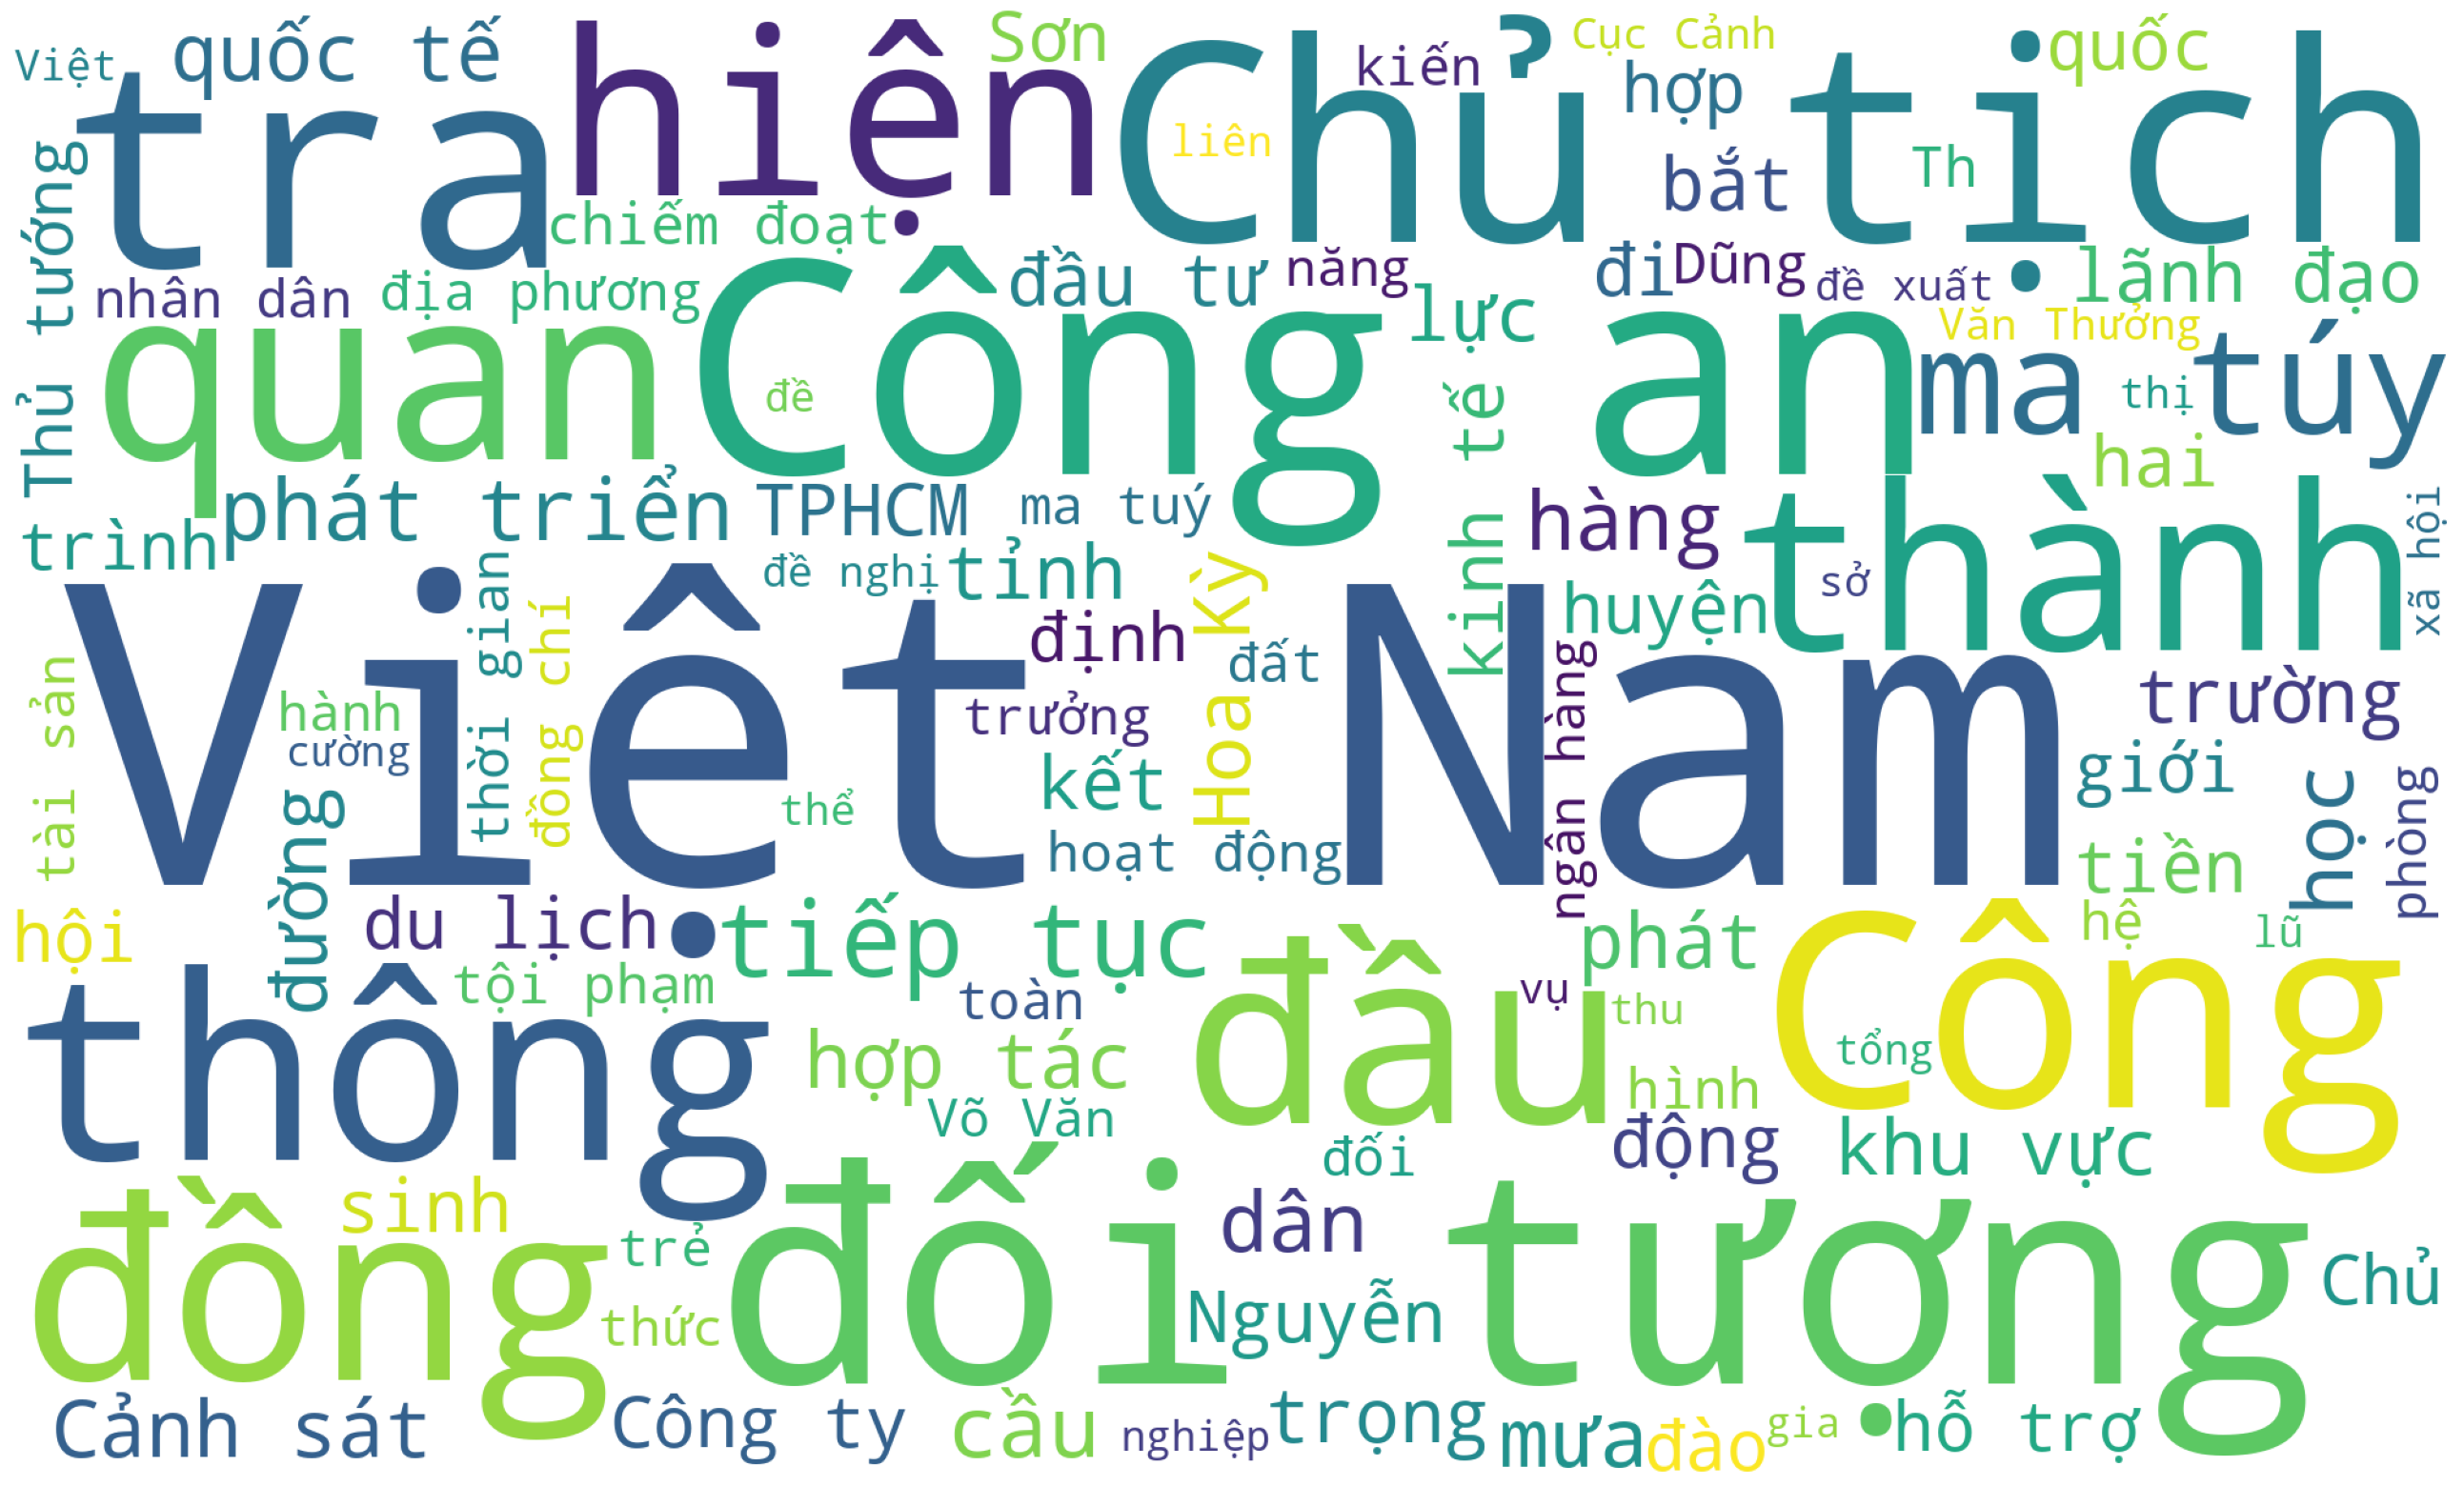

In [42]:
df_text = df[['post_id','post_text']]
text = str(df_text['post_text'])

stopwords_file_path = 'vietnamese-stopwords.txt'
with open(stopwords_file_path, 'r', encoding='utf-8') as file:
    vietnamese_stopwords = set(file.read().splitlines())

all_text_combined = ' '.join(df['post_text'].astype(str))

wordcloud_vietnamese = WordCloud(stopwords=vietnamese_stopwords,
                                 background_color='white',
                                 max_words=100,
                                 width=2000, height=1200,
                                 min_font_size= 6,
                                 ).generate(all_text_combined)

plt.figure(figsize=(40, 20))
plt.imshow(wordcloud_vietnamese)
plt.axis('off')

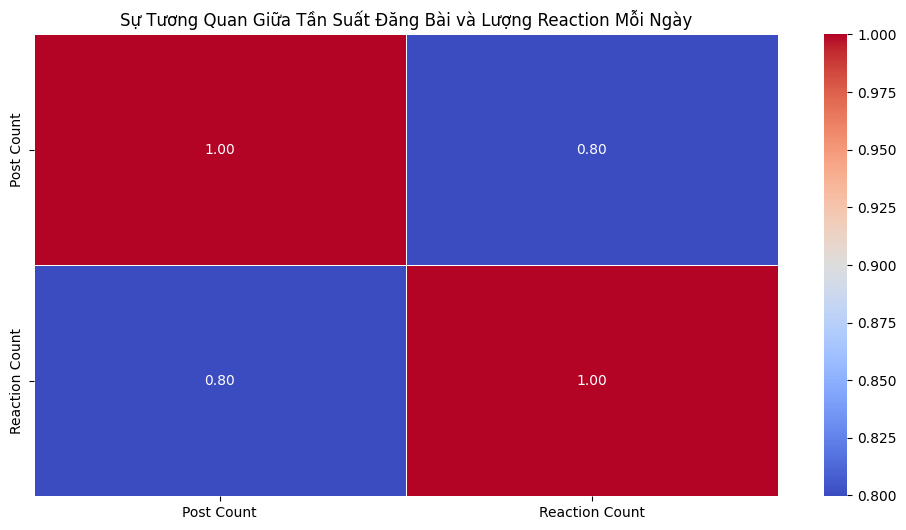

In [43]:
daily_metrics_react = pd.DataFrame({
    'Post Count': daily_post_count,
    'Reaction Count': daily_reaction_count
})

# Vẽ biểu đồ tương quan
plt.figure(figsize=(12, 6))
sns.heatmap(daily_metrics_react.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Sự Tương Quan Giữa Tần Suất Đăng Bài và Lượng Reaction Mỗi Ngày')
plt.show()

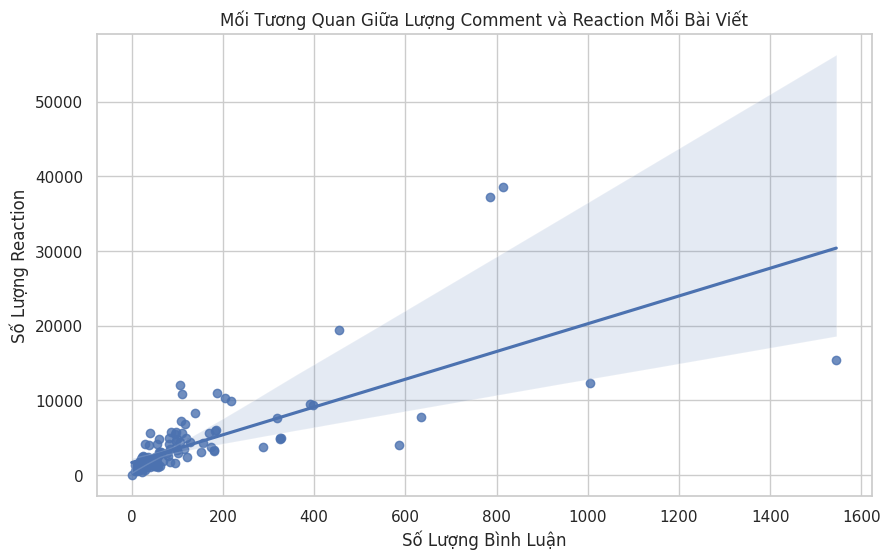

In [44]:
# Thiết lập các thiết lập mặc định của seaborn để cải thiện thẩm mỹ của biểu đồ
sns.set(style="whitegrid", color_codes=True)

# Vẽ biểu đồ tương quan
plt.figure(figsize=(10, 6))
sns.regplot(x='comments', y='reaction_count', data=df)
plt.title('Mối Tương Quan Giữa Lượng Comment và Reaction Mỗi Bài Viết')
plt.xlabel('Số Lượng Bình Luận')
plt.ylabel('Số Lượng Reaction')
plt.show()

In [45]:
daily_comment_count = df.groupby('day')['comments'].sum()

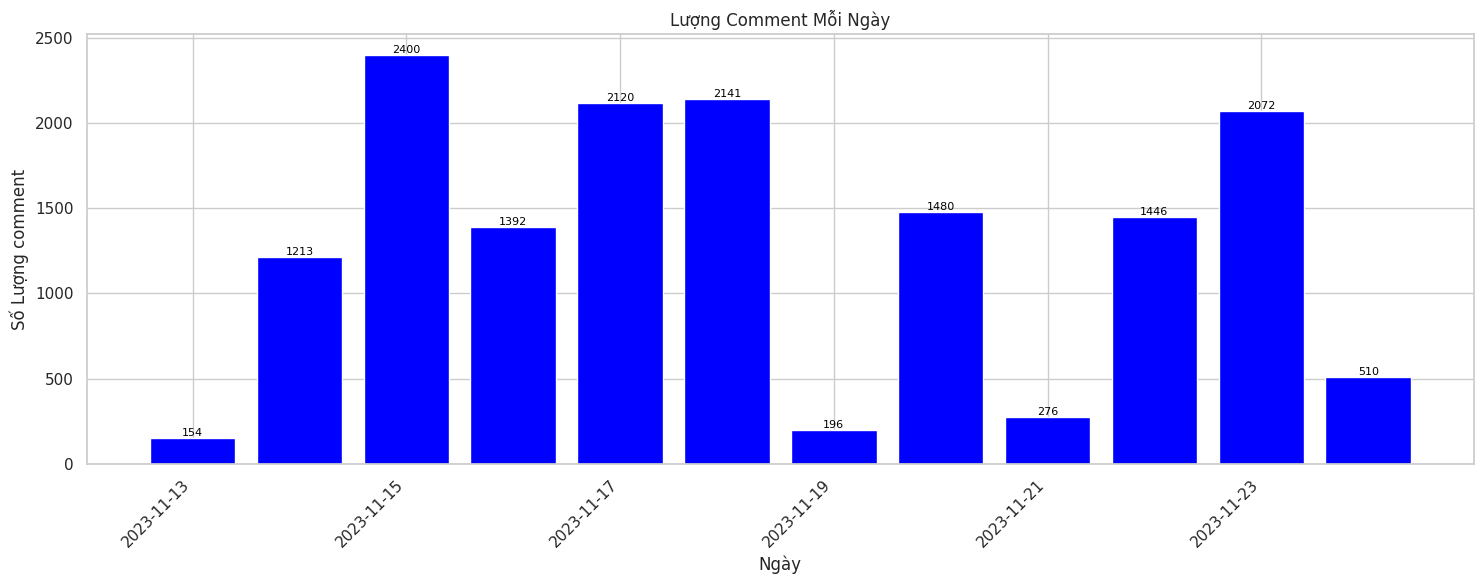

In [46]:
# Visualize số lượng reaction qua mỗi ngày
plt.figure(figsize=(15, 6))
bars = plt.bar(daily_comment_count.index, daily_comment_count.values, color='blue')

# Thêm giá trị trên cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='black', fontsize=8)

plt.title('Lượng Comment Mỗi Ngày')
plt.xlabel('Ngày')
plt.ylabel('Số Lượng comment')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

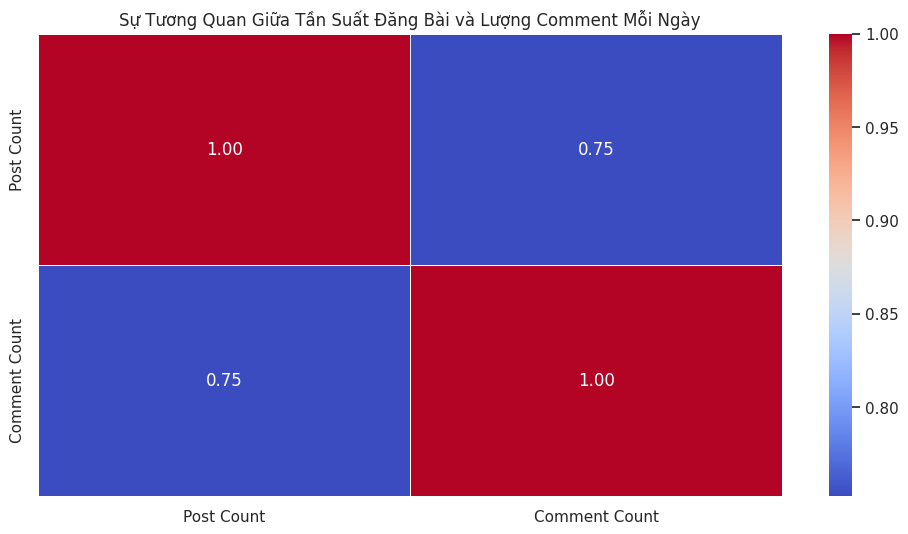

In [47]:
daily_metrics_comment = pd.DataFrame({
    'Post Count': daily_post_count,
    'Comment Count': daily_comment_count
})

# Vẽ biểu đồ tương quan
plt.figure(figsize=(12, 6))
sns.heatmap(daily_metrics_comment.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Sự Tương Quan Giữa Tần Suất Đăng Bài và Lượng Comment Mỗi Ngày')
plt.show()

In [48]:
# Tạo cột lượt tương tác
df['interaction'] = df['reaction_count'] + df['comments'] + df['shares']

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   post_id          132 non-null    string        
 1   post_text        132 non-null    string        
 2   time             132 non-null    datetime64[ns]
 3   comments         132 non-null    int64         
 4   comments_full    132 non-null    object        
 5   shares           132 non-null    int64         
 6   post_url         132 non-null    string        
 7   reactors         132 non-null    object        
 8   reactions        132 non-null    string        
 9   reaction_count   132 non-null    int64         
 10  fetched_time     132 non-null    datetime64[ns]
 11  like             132 non-null    int64         
 12  love             132 non-null    int64         
 13  haha             132 non-null    int64         
 14  wow              132 non-null    int64    

In [71]:
def extract_comment_text(row):
    comments_full = row['comments_full']

    # Check if comments_full is a list
    if isinstance(comments_full, list) and comments_full:
        # If it's a non-empty list, extract the text of the first comment
        first_comment_text = comments_full[0].get('comment_text', 'N/A')
        return first_comment_text
    else:
        # If it's not a list or an empty list, set the value accordingly
        return 'Không có bình luận'

# Apply the function to create a new column 'first_comment_text'
df['first_comment_text'] = df.apply(extract_comment_text, axis=1)

# Display the DataFrame with the new column
print(df[['post_id', 'first_comment_text']])

             post_id  first_comment_text
0    769962078501908  Không có bình luận
1    769948268503289  Không có bình luận
2    769928971838552  Không có bình luận
3    769927171838732  Không có bình luận
4    769918915172891  Không có bình luận
..               ...                 ...
127  763861262445323  Không có bình luận
128  763590949139021  Không có bình luận
129  763592659138850  Không có bình luận
130  763543825810400  Không có bình luận
131  763877429110373  Không có bình luận

[132 rows x 2 columns]
